In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from imblearn.over_sampling import SMOTE, RandomOverSampler

from sklearn.decomposition import PCA

In [2]:
RANDOM_STATE = 2022

# 3s window, 4Hz measurement PAMAP classification

In [3]:
dataframe = pd.read_csv('./data/PAMAP2_Extracted_300_25.csv')

In [4]:
dataframe.head(5)

,0,1,2,3,4,5,6,7,8,9,...,135,136,137,138,139,140,141,142,143,144
0,0,2.37223,8.60074,3.51048,2.43954,8.76165,3.35465,-0.092217,0.056812,-0.015845,...,3.55511,2.92381,8.78856,3.56551,0.010339,0.035223,-0.015202,4.01899,-70.8092,-2.590940
1,0,2.29585,8.67686,3.47059,2.35174,8.62679,3.80806,-0.049142,-0.038741,-0.020873,...,3.43568,2.69787,8.68458,3.68677,0.169545,-0.045680,-0.018241,5.23624,-71.5280,-2.959810
2,0,2.87239,9.23323,2.55365,2.96491,9.14991,2.70393,-0.430040,0.862167,0.438581,...,2.96389,4.31043,7.46421,3.09887,0.213801,0.629110,-0.319256,9.08985,-68.9533,-0.545889
3,0,3.09022,9.35263,3.36474,3.01691,9.21065,3.45878,-0.132352,-0.150542,-0.018884,...,4.43231,2.38958,8.95931,4.39622,-0.462191,0.016133,0.049036,8.32884,-69.3952,-5.055360
4,0,2.87017,8.97734,3.63213,2.97282,9.06021,3.74607,-0.126235,0.030481,-0.038864,...,3.46768,2.18459,8.68819,3.58158,-0.372702,0.114139,-0.001781,15.90850,-69.6117,-5.491680


## Classification on entire data

In [5]:
X = dataframe.drop('0', axis=1)
y = dataframe['0']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=RANDOM_STATE, test_size=0.20)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("train rows: {}, test rows: {}".format(X_train.shape[0], X_test.shape[0]))

train rows: 14655, test rows: 3664


In [7]:
label, count = np.unique(y_train, return_counts=True)
dict(zip(label, count))

{0: 9443, 2: 1917, 3: 1943, 5: 900, 24: 452}

In [8]:
dt = DecisionTreeClassifier(random_state=RANDOM_STATE)
dt.fit(X_train,y_train)

y_pred = dt.predict(X_test)

accuracy = dt.score(X_test, y_test)

print("accuracy = {:.4f}".format(accuracy))

accuracy = 0.8488


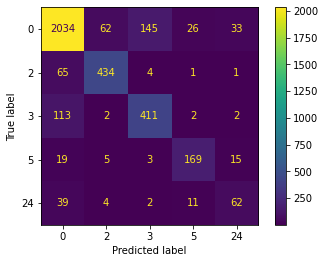

In [9]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

### Oversampling

In [10]:
oversample = SMOTE(random_state=RANDOM_STATE)

X_train_ov, y_train_ov = oversample.fit_resample(X_train, y_train)

In [11]:
label, count = np.unique(y_train_ov, return_counts=True)
dict(zip(label, count))

{0: 9443, 2: 9443, 3: 9443, 5: 9443, 24: 9443}

In [12]:
print("train rows: {}".format(X_train_ov.shape[0]))

train rows: 47215


In [13]:
dt = DecisionTreeClassifier(random_state=RANDOM_STATE)
dt.fit(X_train_ov,y_train_ov)

y_pred = dt.predict(X_test)

accuracy = dt.score(X_test, y_test)

print("accuracy = {:.4f}".format(accuracy))

accuracy = 0.8128


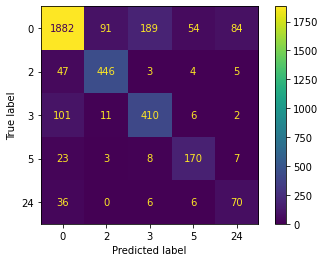

In [14]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [15]:
oversample = RandomOverSampler(random_state=RANDOM_STATE)

X_train_ov, y_train_ov = oversample.fit_resample(X_train, y_train)

In [16]:
label, count = np.unique(y_train_ov, return_counts=True)
dict(zip(label, count))

{0: 9443, 2: 9443, 3: 9443, 5: 9443, 24: 9443}

In [17]:
print("train rows: {}".format(X_train_ov.shape[0]))

train rows: 47215


In [18]:
dt = DecisionTreeClassifier(random_state=RANDOM_STATE)
dt.fit(X_train_ov,y_train_ov)

y_pred = dt.predict(X_test)

accuracy = dt.score(X_test, y_test)

print("accuracy = {:.4f}".format(accuracy))

accuracy = 0.8570


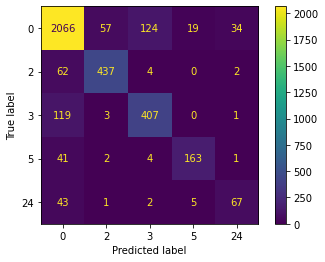

In [19]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

### PCA

In [20]:
pca = PCA(random_state=RANDOM_STATE)

In [21]:
dt = DecisionTreeClassifier(random_state=RANDOM_STATE)

pca.fit(X_train)

explained_variance = pca.explained_variance_ratio_

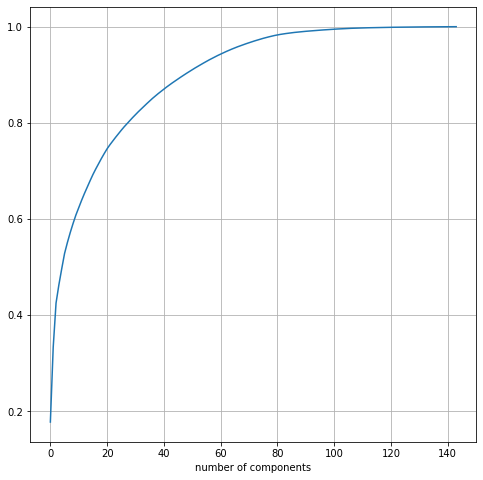

In [22]:
s = 0
for i in range(len(explained_variance)):
    s += explained_variance[i]
    explained_variance[i] = s
    
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot()
ax.plot(explained_variance)
ax.set_xlabel(xlabel='number of components')
ax.grid()
plt.show()

In [23]:
N_COMPONENTS = [10, 20, 40, 60, 80]

In [24]:
accuracies = []

for components in N_COMPONENTS:
    dt = DecisionTreeClassifier(random_state=RANDOM_STATE)
    
    pca = PCA(n_components=components, random_state=RANDOM_STATE)
    
    pca.fit(X_train)
    
    dt.fit(pca.transform(X_train),y_train)

    y_pred = dt.predict(pca.transform(X_test))

    accuracy = dt.score(pca.transform(X_test), y_test)
    
    accuracies.append(accuracy)
    
    print("=====================================")
    print("n_components: {}".format(components))
    print("accuracy = {:.4f}".format(accuracy))

n_components: 10
accuracy = 0.8870
n_components: 20
accuracy = 0.8810
n_components: 40
accuracy = 0.8796
n_components: 60
accuracy = 0.8723
n_components: 80
accuracy = 0.8701


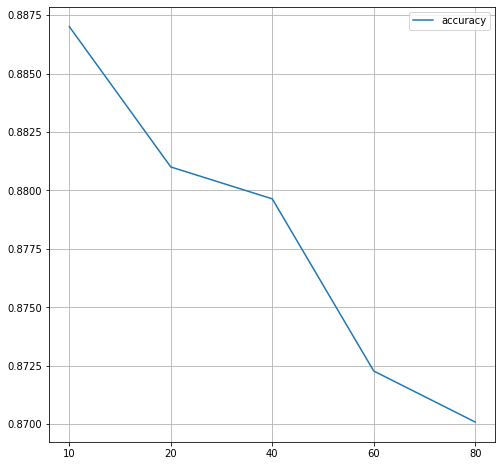

In [25]:
plt.figure(figsize=(8,8))
x = np.arange(len(N_COMPONENTS))
plt.plot(x, accuracies, label="accuracy")
plt.xticks(x, N_COMPONENTS)
plt.legend()
plt.grid()
plt.show()

In [26]:
pca = PCA(n_components=10, random_state=RANDOM_STATE)

In [27]:
pca.fit(X_train)

dt.fit(pca.transform(X_train),y_train)

y_pred = dt.predict(pca.transform(X_test))

accuracy = dt.score(pca.transform(X_test), y_test)

accuracies.append(accuracy)

print("accuracy = {:.4f}".format(accuracy))

accuracy = 0.8870


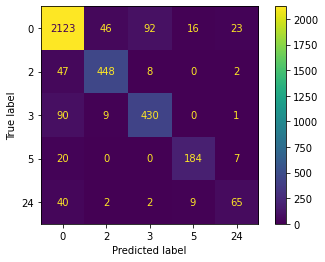

In [28]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

### Class weights adjustemnts

In [29]:
N_COMPONENTS = [5, 10, 15, 20, 30]

In [30]:
accuracies = []

for components in N_COMPONENTS:
    dt = DecisionTreeClassifier(random_state=RANDOM_STATE, class_weight='balanced')
    
    pca = PCA(n_components=components, random_state=RANDOM_STATE)
    
    pca.fit(X_train)
    
    dt.fit(pca.transform(X_train),y_train)

    y_pred = dt.predict(pca.transform(X_test))

    accuracy = dt.score(pca.transform(X_test), y_test)
    
    accuracies.append(accuracy)
    
    print("=====================================")
    print("n_components: {}".format(components))
    print("accuracy = {:.4f}".format(accuracy))

n_components: 5
accuracy = 0.8663
n_components: 10
accuracy = 0.8903
n_components: 15
accuracy = 0.8816
n_components: 20
accuracy = 0.8886
n_components: 30
accuracy = 0.8796


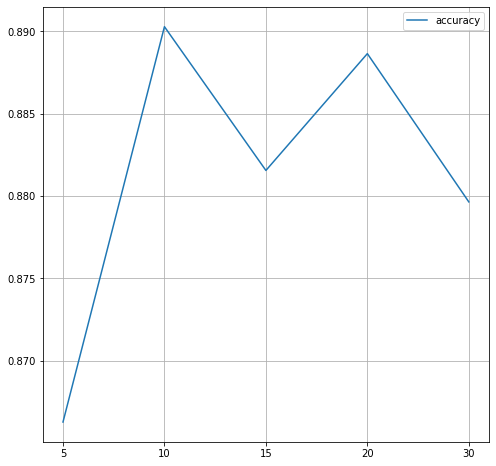

In [31]:
plt.figure(figsize=(8,8))
x = np.arange(len(N_COMPONENTS))
plt.plot(x, accuracies, label="accuracy")
plt.xticks(x, N_COMPONENTS)
plt.legend()
plt.grid()
plt.show()

## Removing IMU data

1-3. 3D-acceleration data (ms-2), scale: Â±16g, resolution: 13-bit

4-6. 3D-acceleration data (ms-2), scale: Â±6g, resolution: 13-bit

7-9. 3D-gyroscope data (rad/s)

10-12. 3D-magnetometer data (Î¼T)

### Removed magnetometer data

In [32]:
X = dataframe.drop('0', axis=1)
y = dataframe['0']

In [33]:
magnetometer_cols = []
for i in range(10, X.shape[1], 12):
    magnetometer_cols.append(str(i))
    magnetometer_cols.append(str(i+1))
    magnetometer_cols.append(str(i+2))

In [34]:
X = X.drop(magnetometer_cols, axis=1)

In [35]:
X.head(5)

,1,2,3,4,5,6,7,8,9,13,...,129,133,134,135,136,137,138,139,140,141
0,2.37223,8.60074,3.51048,2.43954,8.76165,3.35465,-0.092217,0.056812,-0.015845,2.44647,...,0.029452,2.86750,8.97667,3.55511,2.92381,8.78856,3.56551,0.010339,0.035223,-0.015202
1,2.29585,8.67686,3.47059,2.35174,8.62679,3.80806,-0.049142,-0.038741,-0.020873,2.35404,...,-0.013361,2.55984,8.78830,3.43568,2.69787,8.68458,3.68677,0.169545,-0.045680,-0.018241
2,2.87239,9.23323,2.55365,2.96491,9.14991,2.70393,-0.430040,0.862167,0.438581,2.98622,...,0.147539,4.19693,7.59499,2.96389,4.31043,7.46421,3.09887,0.213801,0.629110,-0.319256
3,3.09022,9.35263,3.36474,3.01691,9.21065,3.45878,-0.132352,-0.150542,-0.018884,2.94067,...,0.078498,2.29229,8.79936,4.43231,2.38958,8.95931,4.39622,-0.462191,0.016133,0.049036
4,2.87017,8.97734,3.63213,2.97282,9.06021,3.74607,-0.126235,0.030481,-0.038864,3.12614,...,-0.288542,2.06805,8.52686,3.46768,2.18459,8.68819,3.58158,-0.372702,0.114139,-0.001781


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=RANDOM_STATE, test_size=0.20)

In [37]:
dt = DecisionTreeClassifier(random_state=RANDOM_STATE)
dt.fit(X_train,y_train)

y_pred = dt.predict(X_test)

accuracy = dt.score(X_test, y_test)

print("accuracy = {:.4f}".format(accuracy))

accuracy = 0.7609


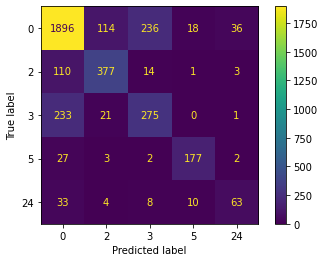

In [38]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

### Removed gyroscope data

In [39]:
X = dataframe.drop('0', axis=1)
y = dataframe['0']

In [40]:
gyroscope_cols = []
for i in range(7, X.shape[1], 12):
    gyroscope_cols.append(str(i))
    gyroscope_cols.append(str(i+1))
    gyroscope_cols.append(str(i+2))

In [41]:
X = X.drop(gyroscope_cols, axis=1)

In [42]:
X.head(5)

,1,2,3,4,5,6,10,11,12,13,...,132,133,134,135,136,137,138,142,143,144
0,2.37223,8.60074,3.51048,2.43954,8.76165,3.35465,14.68060,-69.2128,-5.589050,2.44647,...,-2.94732,2.86750,8.97667,3.55511,2.92381,8.78856,3.56551,4.01899,-70.8092,-2.590940
1,2.29585,8.67686,3.47059,2.35174,8.62679,3.80806,14.65590,-69.0862,-6.860420,2.35404,...,-4.10606,2.55984,8.78830,3.43568,2.69787,8.68458,3.68677,5.23624,-71.5280,-2.959810
2,2.87239,9.23323,2.55365,2.96491,9.14991,2.70393,6.74787,-71.2189,0.035156,2.98622,...,-1.66824,4.19693,7.59499,2.96389,4.31043,7.46421,3.09887,9.08985,-68.9533,-0.545889
3,3.09022,9.35263,3.36474,3.01691,9.21065,3.45878,3.88699,-71.7704,-3.409880,2.94067,...,-3.22523,2.29229,8.79936,4.43231,2.38958,8.95931,4.39622,8.32884,-69.3952,-5.055360
4,2.87017,8.97734,3.63213,2.97282,9.06021,3.74607,4.89423,-71.6125,-3.303990,3.12614,...,-5.92542,2.06805,8.52686,3.46768,2.18459,8.68819,3.58158,15.90850,-69.6117,-5.491680


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=RANDOM_STATE, test_size=0.20)

In [44]:
dt = DecisionTreeClassifier(random_state=RANDOM_STATE)
dt.fit(X_train,y_train)

y_pred = dt.predict(X_test)

accuracy = dt.score(X_test, y_test)

print("accuracy = {:.4f}".format(accuracy))

accuracy = 0.8466


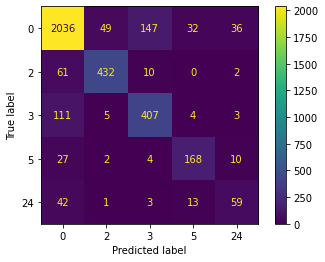

In [45]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

### Removed magnetometer and gyroscope data

In [46]:
X = dataframe.drop('0', axis=1)
y = dataframe['0']

In [47]:
X = X.drop(magnetometer_cols, axis=1)
X = X.drop(gyroscope_cols, axis=1)

In [48]:
X.head(5)

,1,2,3,4,5,6,13,14,15,16,...,123,124,125,126,133,134,135,136,137,138
0,2.37223,8.60074,3.51048,2.43954,8.76165,3.35465,2.44647,8.97854,3.39485,2.44295,...,3.51824,2.92116,8.60722,3.43000,2.86750,8.97667,3.55511,2.92381,8.78856,3.56551
1,2.29585,8.67686,3.47059,2.35174,8.62679,3.80806,2.35404,9.05064,2.89289,2.63371,...,3.36618,3.13621,9.10403,3.41359,2.55984,8.78830,3.43568,2.69787,8.68458,3.68677
2,2.87239,9.23323,2.55365,2.96491,9.14991,2.70393,2.98622,8.78778,3.74997,2.80968,...,3.35060,2.26439,9.27655,3.51981,4.19693,7.59499,2.96389,4.31043,7.46421,3.09887
3,3.09022,9.35263,3.36474,3.01691,9.21065,3.45878,2.94067,8.82399,3.51824,2.92116,...,3.81909,2.32450,8.70275,4.07973,2.29229,8.79936,4.43231,2.38958,8.95931,4.39622
4,2.87017,8.97734,3.63213,2.97282,9.06021,3.74607,3.12614,9.08677,3.36618,3.13621,...,2.91330,1.64884,10.17140,2.89935,2.06805,8.52686,3.46768,2.18459,8.68819,3.58158


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=RANDOM_STATE, test_size=0.20)

In [50]:
dt = DecisionTreeClassifier(random_state=RANDOM_STATE)
dt.fit(X_train,y_train)

y_pred = dt.predict(X_test)

accuracy = dt.score(X_test, y_test)

print("accuracy = {:.4f}".format(accuracy))

accuracy = 0.7754


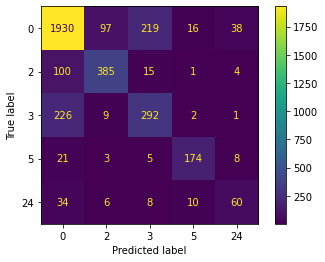

In [51]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

### Removed acceleration 4-6 data

In [52]:
X = dataframe.drop('0', axis=1)
y = dataframe['0']

In [53]:
acc_4_6_cols = []
for i in range(4, X.shape[1], 12):
    acc_4_6_cols.append(str(i))
    acc_4_6_cols.append(str(i+1))
    acc_4_6_cols.append(str(i+2))

In [54]:
X = X.drop(acc_4_6_cols, axis=1)

In [55]:
X.head(5)

,1,2,3,7,8,9,10,11,12,13,...,132,133,134,135,139,140,141,142,143,144
0,2.37223,8.60074,3.51048,-0.092217,0.056812,-0.015845,14.68060,-69.2128,-5.589050,2.44647,...,-2.94732,2.86750,8.97667,3.55511,0.010339,0.035223,-0.015202,4.01899,-70.8092,-2.590940
1,2.29585,8.67686,3.47059,-0.049142,-0.038741,-0.020873,14.65590,-69.0862,-6.860420,2.35404,...,-4.10606,2.55984,8.78830,3.43568,0.169545,-0.045680,-0.018241,5.23624,-71.5280,-2.959810
2,2.87239,9.23323,2.55365,-0.430040,0.862167,0.438581,6.74787,-71.2189,0.035156,2.98622,...,-1.66824,4.19693,7.59499,2.96389,0.213801,0.629110,-0.319256,9.08985,-68.9533,-0.545889
3,3.09022,9.35263,3.36474,-0.132352,-0.150542,-0.018884,3.88699,-71.7704,-3.409880,2.94067,...,-3.22523,2.29229,8.79936,4.43231,-0.462191,0.016133,0.049036,8.32884,-69.3952,-5.055360
4,2.87017,8.97734,3.63213,-0.126235,0.030481,-0.038864,4.89423,-71.6125,-3.303990,3.12614,...,-5.92542,2.06805,8.52686,3.46768,-0.372702,0.114139,-0.001781,15.90850,-69.6117,-5.491680


In [56]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=RANDOM_STATE, test_size=0.20)

In [57]:
dt = DecisionTreeClassifier(random_state=RANDOM_STATE)
dt.fit(X_train,y_train)

y_pred = dt.predict(X_test)

accuracy = dt.score(X_test, y_test)

print("accuracy = {:.4f}".format(accuracy))

accuracy = 0.8502


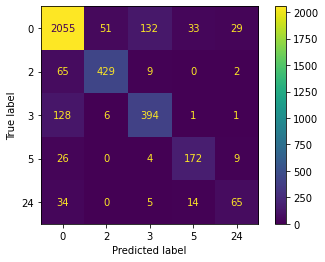

In [58]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

#### Oversampling

In [59]:
oversample = SMOTE(random_state=RANDOM_STATE)

X_train_ov, y_train_ov = oversample.fit_resample(X_train, y_train)

In [60]:
dt = DecisionTreeClassifier(random_state=RANDOM_STATE)
dt.fit(X_train_ov,y_train_ov)

y_pred = dt.predict(X_test)

accuracy = dt.score(X_test, y_test)

print("accuracy = {:.4f}".format(accuracy))

accuracy = 0.8324


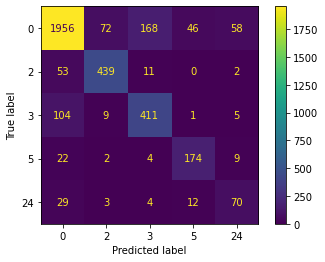

In [61]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [62]:
oversample = RandomOverSampler(random_state=RANDOM_STATE)

X_train_ov, y_train_ov = oversample.fit_resample(X_train, y_train)

In [63]:
dt = DecisionTreeClassifier(random_state=RANDOM_STATE)
dt.fit(X_train_ov,y_train_ov)

y_pred = dt.predict(X_test)

accuracy = dt.score(X_test, y_test)

print("accuracy = {:.4f}".format(accuracy))

accuracy = 0.8573


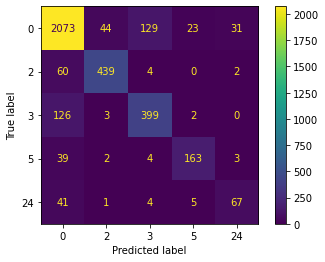

In [64]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

#### PCA

In [65]:
pca = PCA(random_state=RANDOM_STATE)

In [66]:
pca.fit(X_train)

explained_variance = pca.explained_variance_ratio_

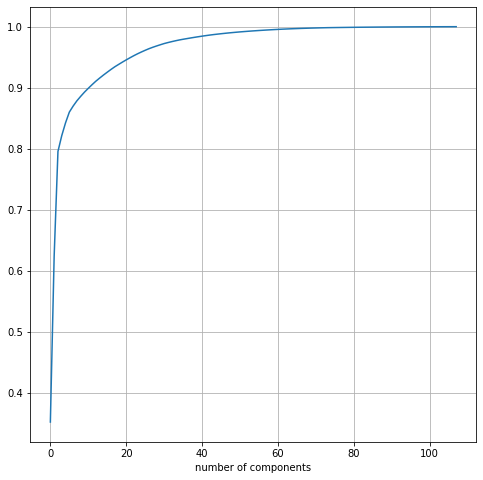

In [67]:
s = 0
for i in range(len(explained_variance)):
    s += explained_variance[i]
    explained_variance[i] = s
    
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot()
ax.plot(explained_variance)
ax.set_xlabel(xlabel='number of components')
ax.grid()
plt.show()

In [68]:
N_COMPONENTS = [10, 20, 40, 60]

In [69]:
accuracies = []

for components in N_COMPONENTS:
    dt = DecisionTreeClassifier(random_state=RANDOM_STATE)
    
    pca = PCA(n_components=components, random_state=RANDOM_STATE)
    
    pca.fit(X_train)
    
    dt.fit(pca.transform(X_train),y_train)

    y_pred = dt.predict(pca.transform(X_test))

    accuracy = dt.score(pca.transform(X_test), y_test)
    
    accuracies.append(accuracy)
    
    print("=====================================")
    print("n_components: {}".format(components))
    print("accuracy = {:.4f}".format(accuracy))

n_components: 10
accuracy = 0.8270
n_components: 20
accuracy = 0.8534
n_components: 40
accuracy = 0.8502
n_components: 60
accuracy = 0.8433


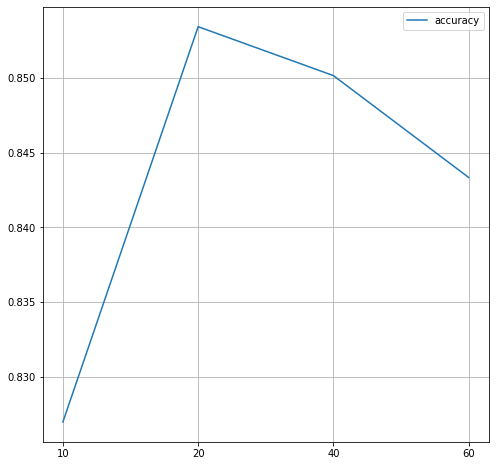

In [70]:
plt.figure(figsize=(8,8))
x = np.arange(len(N_COMPONENTS))
plt.plot(x, accuracies, label="accuracy")
plt.xticks(x, N_COMPONENTS)
plt.legend()
plt.grid()
plt.show()

### Removed acceleration 1-3 data

In [71]:
X = dataframe.drop('0', axis=1)
y = dataframe['0']

In [72]:
acc_1_3_cols = []
for i in range(1, X.shape[1], 12):
    acc_1_3_cols.append(str(i))
    acc_1_3_cols.append(str(i+1))
    acc_1_3_cols.append(str(i+2))

In [73]:
X = X.drop(acc_1_3_cols, axis=1)

In [74]:
X.head(5)

,4,5,6,7,8,9,10,11,12,16,...,132,136,137,138,139,140,141,142,143,144
0,2.43954,8.76165,3.35465,-0.092217,0.056812,-0.015845,14.68060,-69.2128,-5.589050,2.44295,...,-2.94732,2.92381,8.78856,3.56551,0.010339,0.035223,-0.015202,4.01899,-70.8092,-2.590940
1,2.35174,8.62679,3.80806,-0.049142,-0.038741,-0.020873,14.65590,-69.0862,-6.860420,2.63371,...,-4.10606,2.69787,8.68458,3.68677,0.169545,-0.045680,-0.018241,5.23624,-71.5280,-2.959810
2,2.96491,9.14991,2.70393,-0.430040,0.862167,0.438581,6.74787,-71.2189,0.035156,2.80968,...,-1.66824,4.31043,7.46421,3.09887,0.213801,0.629110,-0.319256,9.08985,-68.9533,-0.545889
3,3.01691,9.21065,3.45878,-0.132352,-0.150542,-0.018884,3.88699,-71.7704,-3.409880,2.92116,...,-3.22523,2.38958,8.95931,4.39622,-0.462191,0.016133,0.049036,8.32884,-69.3952,-5.055360
4,2.97282,9.06021,3.74607,-0.126235,0.030481,-0.038864,4.89423,-71.6125,-3.303990,3.13621,...,-5.92542,2.18459,8.68819,3.58158,-0.372702,0.114139,-0.001781,15.90850,-69.6117,-5.491680


In [75]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=RANDOM_STATE, test_size=0.20)

In [76]:
dt = DecisionTreeClassifier(random_state=RANDOM_STATE)
dt.fit(X_train,y_train)

y_pred = dt.predict(X_test)

accuracy = dt.score(X_test, y_test)

print("accuracy = {:.4f}".format(accuracy))

accuracy = 0.8493


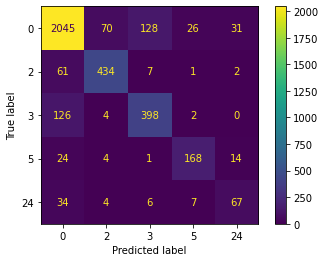

In [77]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

### Removed acceleration data

In [78]:
X = dataframe.drop('0', axis=1)
y = dataframe['0']

In [79]:
X = X.drop(acc_1_3_cols, axis=1)
X = X.drop(acc_4_6_cols, axis=1)

In [80]:
X.head(5)

,7,8,9,10,11,12,19,20,21,22,...,129,130,131,132,139,140,141,142,143,144
0,-0.092217,0.056812,-0.015845,14.68060,-69.2128,-5.589050,-0.067544,0.056746,-0.003826,15.80040,...,0.029452,4.00819,-71.6745,-2.94732,0.010339,0.035223,-0.015202,4.01899,-70.8092,-2.590940
1,-0.049142,-0.038741,-0.020873,14.65590,-69.0862,-6.860420,0.447234,0.004478,-0.014667,15.18320,...,-0.013361,4.43299,-71.3578,-4.10606,0.169545,-0.045680,-0.018241,5.23624,-71.5280,-2.959810
2,-0.430040,0.862167,0.438581,6.74787,-71.2189,0.035156,0.055655,0.046364,-0.004223,3.34363,...,0.147539,5.04520,-70.0100,-1.66824,0.213801,0.629110,-0.319256,9.08985,-68.9533,-0.545889
3,-0.132352,-0.150542,-0.018884,3.88699,-71.7704,-3.409880,0.046345,0.006161,0.029452,4.00819,...,0.078498,9.70210,-69.9337,-3.22523,-0.462191,0.016133,0.049036,8.32884,-69.3952,-5.055360
4,-0.126235,0.030481,-0.038864,4.89423,-71.6125,-3.303990,-0.268035,0.023673,-0.013361,4.43299,...,-0.288542,14.56610,-68.3312,-5.92542,-0.372702,0.114139,-0.001781,15.90850,-69.6117,-5.491680


In [81]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=RANDOM_STATE, test_size=0.20)

In [82]:
dt = DecisionTreeClassifier(random_state=RANDOM_STATE)
dt.fit(X_train,y_train)

y_pred = dt.predict(X_test)

accuracy = dt.score(X_test, y_test)

print("accuracy = {:.4f}".format(accuracy))

accuracy = 0.8207


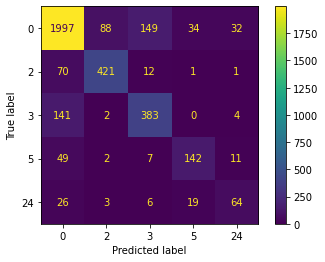

In [83]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

### Removed acceleration and gyroscope data

In [84]:
X = dataframe.drop('0', axis=1)
y = dataframe['0']

In [85]:
X = X.drop(acc_1_3_cols, axis=1)
X = X.drop(acc_4_6_cols, axis=1)
X = X.drop(gyroscope_cols, axis=1)

In [86]:
X.head(5)

,10,11,12,22,23,24,34,35,36,46,...,108,118,119,120,130,131,132,142,143,144
0,14.68060,-69.2128,-5.589050,15.80040,-68.8438,-5.48217,15.34500,-68.8115,-5.93952,14.65590,...,-3.861670,3.88699,-71.7704,-3.40988,4.00819,-71.6745,-2.94732,4.01899,-70.8092,-2.590940
1,14.65590,-69.0862,-6.860420,15.18320,-68.9511,-2.81450,14.27660,-69.1802,2.16975,6.74787,...,-2.590940,4.89423,-71.6125,-3.30399,4.43299,-71.3578,-4.10606,5.23624,-71.5280,-2.959810
2,6.74787,-71.2189,0.035156,3.34363,-71.0935,-2.81772,2.87338,-71.8146,-3.86167,3.88699,...,-2.959810,5.22709,-71.5215,-3.42255,5.04520,-70.0100,-1.66824,9.08985,-68.9533,-0.545889
3,3.88699,-71.7704,-3.409880,4.00819,-71.6745,-2.94732,4.01899,-70.8092,-2.59094,4.89423,...,-0.545889,10.16170,-69.5325,-2.64752,9.70210,-69.9337,-3.22523,8.32884,-69.3952,-5.055360
4,4.89423,-71.6125,-3.303990,4.43299,-71.3578,-4.10606,5.23624,-71.5280,-2.95981,5.22709,...,-5.055360,9.21699,-69.8803,-5.18649,14.56610,-68.3312,-5.92542,15.90850,-69.6117,-5.491680


In [87]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=RANDOM_STATE, test_size=0.20)

In [88]:
dt = DecisionTreeClassifier(random_state=RANDOM_STATE)
dt.fit(X_train,y_train)

y_pred = dt.predict(X_test)

accuracy = dt.score(X_test, y_test)

print("accuracy = {:.4f}".format(accuracy))

accuracy = 0.8218


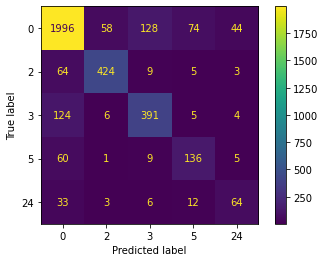

In [89]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

# 3s window, 10Hz measurement PAMAP classification

In [90]:
dataframe = pd.read_csv('./data/PAMAP2_Extracted_300_10.csv')

In [91]:
dataframe.head(5)

,0,1,2,3,4,5,6,7,8,9,...,351,352,353,354,355,356,357,358,359,360
0,0,2.37223,8.60074,3.51048,2.43954,8.76165,3.35465,-0.092217,0.056812,-0.015845,...,3.63248,2.84744,8.62303,3.61125,-0.168271,0.046555,-0.065634,4.11368,-72.0041,-3.18354
1,0,2.29585,8.67686,3.47059,2.35174,8.62679,3.80806,-0.049142,-0.038741,-0.020873,...,3.62700,2.62341,8.79084,3.68662,-0.093857,0.001727,0.019122,4.23946,-71.9115,-2.48961
2,0,2.87239,9.23323,2.55365,2.96491,9.14991,2.70393,-0.430040,0.862167,0.438581,...,3.70051,2.52779,9.56213,4.09274,-0.644130,0.160829,0.134891,11.28800,-68.7317,-2.30461
3,0,3.09022,9.35263,3.36474,3.01691,9.21065,3.45878,-0.132352,-0.150542,-0.018884,...,3.66121,2.26816,9.15624,4.09390,0.773302,-0.416489,-0.082489,9.82100,-69.8362,-2.87835
4,0,2.87017,8.97734,3.63213,2.97282,9.06021,3.74607,-0.126235,0.030481,-0.038864,...,3.81286,1.91886,8.76617,4.17062,-0.172123,0.064579,-0.016637,16.76740,-68.4393,-7.45627


## Classification on entire data

In [92]:
X = dataframe.drop('0', axis=1)
y = dataframe['0']

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=RANDOM_STATE, test_size=0.20)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("train rows: {}, test rows: {}".format(X_train.shape[0], X_test.shape[0]))

train rows: 14226, test rows: 3557


In [94]:
label, count = np.unique(y_train, return_counts=True)
dict(zip(label, count))

{0: 9231, 2: 1929, 3: 1935, 5: 745, 24: 386}

In [95]:
dt = DecisionTreeClassifier(random_state=RANDOM_STATE)
dt.fit(X_train,y_train)

y_pred = dt.predict(X_test)

accuracy = dt.score(X_test, y_test)

print("accuracy = {:.4f}".format(accuracy))

accuracy = 0.8541


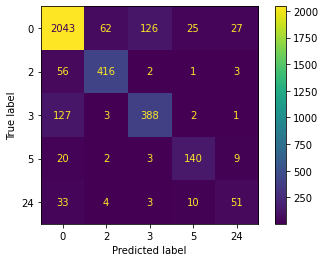

In [96]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

### Oversampling

In [97]:
oversample = SMOTE(random_state=RANDOM_STATE)

X_train_ov, y_train_ov = oversample.fit_resample(X_train, y_train)

In [98]:
label, count = np.unique(y_train_ov, return_counts=True)
dict(zip(label, count))

{0: 9231, 2: 9231, 3: 9231, 5: 9231, 24: 9231}

In [99]:
print("train rows: {}".format(X_train_ov.shape[0]))

train rows: 46155


In [100]:
dt = DecisionTreeClassifier(random_state=RANDOM_STATE)
dt.fit(X_train_ov,y_train_ov)

y_pred = dt.predict(X_test)

accuracy = dt.score(X_test, y_test)

print("accuracy = {:.4f}".format(accuracy))

accuracy = 0.8220


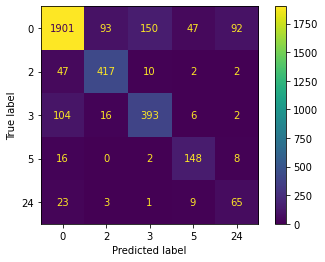

In [101]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [102]:
oversample = RandomOverSampler(random_state=RANDOM_STATE)

X_train_ov, y_train_ov = oversample.fit_resample(X_train, y_train)

In [103]:
label, count = np.unique(y_train_ov, return_counts=True)
dict(zip(label, count))

{0: 9231, 2: 9231, 3: 9231, 5: 9231, 24: 9231}

In [104]:
print("train rows: {}".format(X_train_ov.shape[0]))

train rows: 46155


In [105]:
dt = DecisionTreeClassifier(random_state=RANDOM_STATE)
dt.fit(X_train_ov,y_train_ov)

y_pred = dt.predict(X_test)

accuracy = dt.score(X_test, y_test)

print("accuracy = {:.4f}".format(accuracy))

accuracy = 0.8527


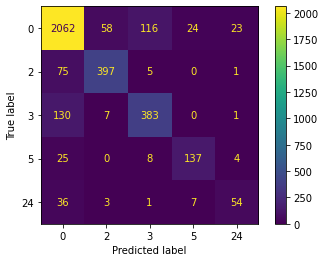

In [106]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

### PCA

In [107]:
pca = PCA(random_state=RANDOM_STATE)

In [108]:
pca.fit(X_train)

explained_variance = pca.explained_variance_ratio_

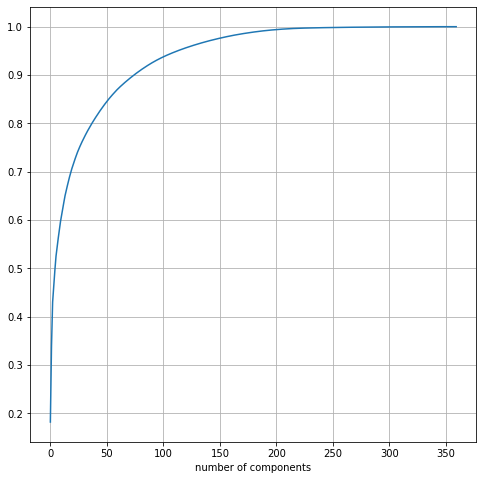

In [109]:
s = 0
for i in range(len(explained_variance)):
    s += explained_variance[i]
    explained_variance[i] = s
    
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot()
ax.plot(explained_variance)
ax.set_xlabel(xlabel='number of components')
ax.grid()
plt.show()

In [110]:
N_COMPONENTS = [10, 20, 40, 60, 80, 100, 150]

In [111]:
accuracies = []

for components in N_COMPONENTS:
    dt = DecisionTreeClassifier(random_state=RANDOM_STATE)
    
    pca = PCA(n_components=components, random_state=RANDOM_STATE)
    
    pca.fit(X_train)
    
    dt.fit(pca.transform(X_train),y_train)

    y_pred = dt.predict(pca.transform(X_test))

    accuracy = dt.score(pca.transform(X_test), y_test)
    
    accuracies.append(accuracy)
    
    print("=====================================")
    print("n_components: {}".format(components))
    print("accuracy = {:.4f}".format(accuracy))

n_components: 10
accuracy = 0.8932
n_components: 20
accuracy = 0.8960
n_components: 40
accuracy = 0.8732
n_components: 60
accuracy = 0.8766
n_components: 80
accuracy = 0.8670
n_components: 100
accuracy = 0.8594
n_components: 150
accuracy = 0.8535


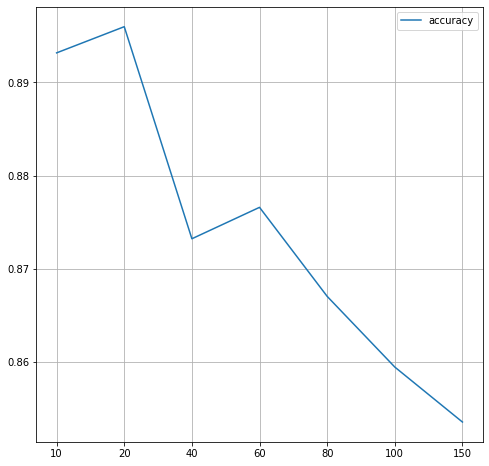

In [112]:
plt.figure(figsize=(8,8))
x = np.arange(len(N_COMPONENTS))
plt.plot(x, accuracies, label="accuracy")
plt.xticks(x, N_COMPONENTS)
plt.legend()
plt.grid()
plt.show()

In [113]:
pca = PCA(n_components=20, random_state=RANDOM_STATE)

In [114]:
dt = DecisionTreeClassifier(random_state=RANDOM_STATE)

pca.fit(X_train)

dt.fit(pca.transform(X_train),y_train)

y_pred = dt.predict(pca.transform(X_test))

accuracy = dt.score(pca.transform(X_test), y_test)

accuracies.append(accuracy)

print("accuracy = {:.4f}".format(accuracy))

accuracy = 0.8960


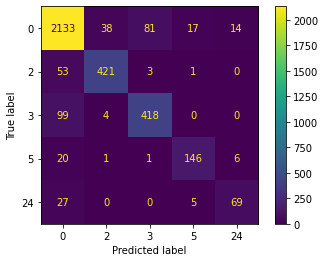

In [115]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

### Class weights adjustemnts

In [116]:
N_COMPONENTS = [5, 10, 15, 20, 30]

In [117]:
accuracies = []

for components in N_COMPONENTS:
    dt = DecisionTreeClassifier(random_state=RANDOM_STATE, class_weight='balanced')
    
    pca = PCA(n_components=components, random_state=RANDOM_STATE)
    
    pca.fit(X_train)
    
    dt.fit(pca.transform(X_train),y_train)

    y_pred = dt.predict(pca.transform(X_test))

    accuracy = dt.score(pca.transform(X_test), y_test)
    
    accuracies.append(accuracy)
    
    print("=====================================")
    print("n_components: {}".format(components))
    print("accuracy = {:.4f}".format(accuracy))

n_components: 5
accuracy = 0.8704
n_components: 10
accuracy = 0.9008
n_components: 15
accuracy = 0.8957
n_components: 20
accuracy = 0.8887
n_components: 30
accuracy = 0.8842


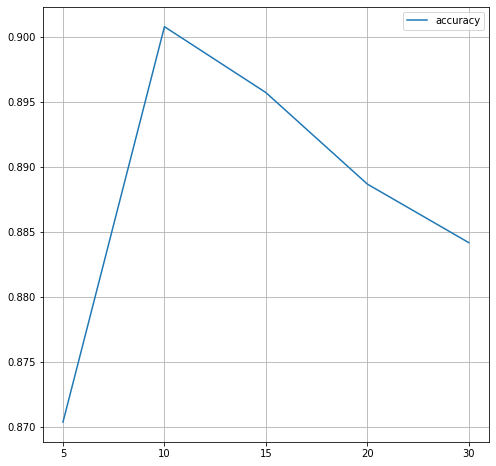

In [118]:
plt.figure(figsize=(8,8))
x = np.arange(len(N_COMPONENTS))
plt.plot(x, accuracies, label="accuracy")
plt.xticks(x, N_COMPONENTS)
plt.legend()
plt.grid()
plt.show()

# Podsumowanie
